In [ ]:
!pip install --upgrade pip #Standard pip upgrade
!pip install sentencepiece #Text tokeniser. More info: https://github.com/google/sentencepiece
!pip install transformers #HuggingFace API. More info: https://huggingface.co/docs/transformers/main/en/index
from torch.utils.data import DataLoader #PyTorch data loading utility
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.special import softmax
from torch.utils.data import DataLoader
import numpy as np
from scipy.special import softmax #the softmax function (vector is transformed into another vector which sums to 1)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive') #standard drive mounting



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.8 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
CUDA = True # set to true if using GPU (Runtime -> Change runtime Type -> GPU)
BATCH_SIZE = 32
n_labels = 3
labels_ids = {'negative': 0, 'neutral': 1, 'positive':2}
max_length = 312
MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment" #chosen model from Hugging Face
tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=True) #use_fast simply loads the fast version of the Tokeniser
config = AutoConfig.from_pretrained(MODEL) # used for id to label name
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
if CUDA:
  model = model.to('cuda') #This sends the parameters to the GPU assigned in CUDA = True
_ = model.eval()

In [ ]:
def forward(text, cuda=True):
  encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
  if cuda:
    encoded_input.to('cuda')
    output = model(**encoded_input)
    scores = output[0].detach().cpu().numpy() #cuda parametrisation
  else:
    output = model(**encoded_input)
    scores = output[0].detach().numpy()
  
  scores = softmax(scores, axis=-1)
  return scores
def sentiment_pred_score (data_list):
  dl = DataLoader(data_list, batch_size=BATCH_SIZE)
  sentiment_pred = []

  for idx, batch in enumerate(dl):
    if idx % 1 == 0:
      print('Batch ',idx+1,' of ', len(dl))

    scores = forward(batch, cuda=CUDA)
    preds = np.argmax(scores, axis=-1)
    sentiment_pred.extend(preds)
  
  return sentiment_pred

In [ ]:
dfAlvNeg=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Alametsa/_NEGATIVEALAMETSA.csv',low_memory=False,  lineterminator='\n', sep=',',)
#dfAlvNeu=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Neutral-Alametsa/_NEUTRALALAMETSA.csv',low_memory=False,  lineterminator='\n', sep=',',)
#dfAlvPos=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Positive-Alametsa/_POSITIVEALAMETSA.csv',low_memory=False,  lineterminator='\n', sep=',',)
dfLarNeg=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Larrouturou/_NEGATIVELARROUTUROU.csv',low_memory=False,  lineterminator='\n', sep=',',)
#dfLarNeu=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Neutral-Larrouturou/_NEUTRALLARROUTUROU.csv',low_memory=False,  lineterminator='\n', sep=',',)
#dfLarPos=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Positive-Larrouturou/_POSITIVELARROUTUROU.csv',low_memory=False,  lineterminator='\n', sep=',',)#error_bad_lines=False)

AlvNeg=dfAlvNeg['text'].tolist()
#AlvNeu=dfAlvNeu['text'].tolist()
#AlvPos=dfAlvPos['text'].tolist()
LarNeg=dfLarNeg['text'].tolist()
#LarNeu=dfLarNeu['text'].tolist()
#LarPos=dfLarPos['text'].tolist()

In [ ]:
AlvNegSentiment= sentiment_pred_score(AlvNeg)
dfAlvNeg['tweetSentiment.score'] = AlvNegSentiment
dfAlvNeg.to_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Alametsa/_NEGATIVEALAMETSA2.csv', index=False)

LarNegSentiment= sentiment_pred_score(LarNeg)
dfLarNeg['tweetSentiment.score'] = LarNegSentiment
dfLarNeg.to_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Larrouturou/_NEGATIVELARROUTUROU2.csv', index=False)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Streaming output truncated to the last 5000 lines.
Batch  5835  of  10834
Batch  5836  of  10834
Batch  5837  of  10834
Batch  5838  of  10834
Batch  5839  of  10834
Batch  5840  of  10834
Batch  5841  of  10834
Batch  5842  of  10834
Batch  5843  of  10834
Batch  5844  of  10834
Batch  5845  of  10834
Batch  5846  of  10834
Batch  5847  of  10834
Batch  5848  of  10834
Batch  5849  of  10834
Batch  5850  of  10834
Batch  5851  of  10834
Batch  5852  of  10834
Batch  5853  of  10834
Batch  5854  of  10834
Batch  5855  of  10834
Batch  5856  of  10834
Batch  5857  of  10834
Batch  5858  of  10834
Batch  5859  of  10834
Batch  5860  of  10834
Batch  5861  of  10834
Batch  5862  of  10834
Batch  5863  of  10834
Batch  5864  of  10834
Batch  5865  of  10834
Batch  5866  of  10834
Batch  5867  of  10834
Batch  5868  of  10834
Batch  5869  of  10834
Batch  5870  of  10834
Batch  5871  of  10834
Batch  5872  of  10834
Batch  5873  of  10834
Batch  5874  of  10834
Batch  5875  of  10834
Batch 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


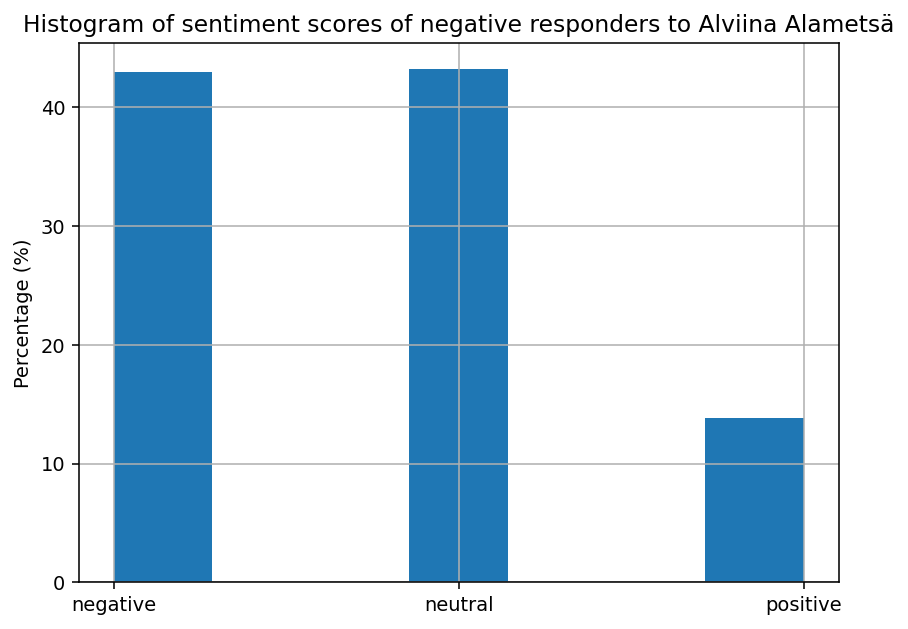

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
n_labels = 3
labels_ids = {'negative': 0, 'neutral': 1, 'positive':2}
dfAlvNeg=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Alametsa/_NEGATIVEALAMETSA2.csv',low_memory=False,  lineterminator='\n', sep=',',)
x = np.arange(n_labels)
bins = np.linspace(0, 2, 8)
x = np.arange(n_labels)
bins = np.linspace(0, 2, 8)

fig, ax = plt.subplots (figsize=(7, 5), dpi=140)
plt.title ('Histogram of sentiment scores of negative responders to Alviina Alametsä')
#plt.hist (df ['messageSentiment.score'], bins, label=['label'] )
dfAlvNeg['tweetSentiment.score'].hist(bins=bins, weights=np.ones_like(dfAlvNeg[dfAlvNeg.columns[0]]) * 100. / len(dfAlvNeg))
plt.ylabel('Percentage (%)')
ax.set_xticks (x)
ax.set_xticklabels (list(labels_ids.keys()))
ax.grid(True)
#ax.legend (loc='upper right')
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.show ()

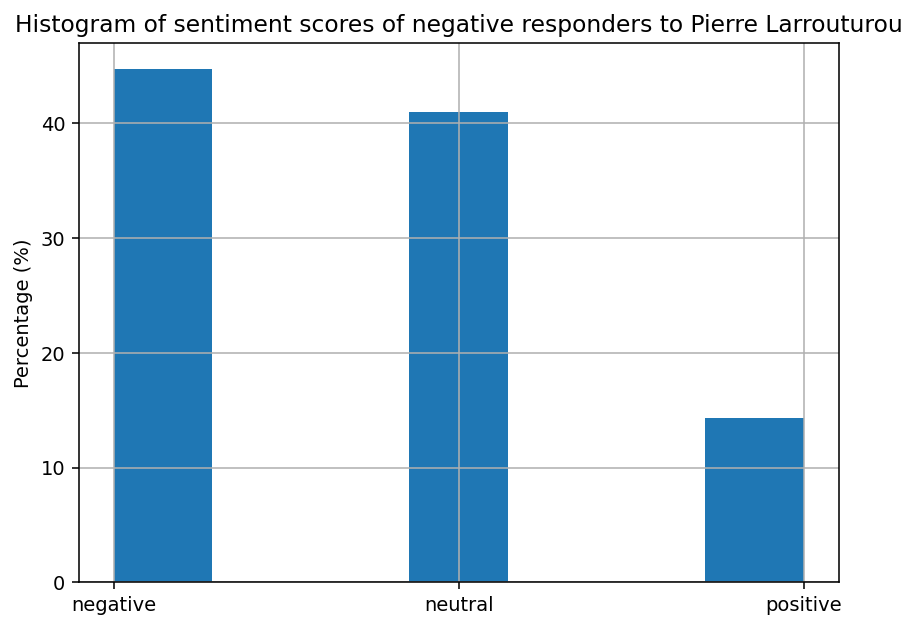

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
n_labels = 3
labels_ids = {'negative': 0, 'neutral': 1, 'positive':2}
dfLarNeg=pd.read_csv('/content/drive/MyDrive/TLS stuff/Scraped accounts/Negative-Larrouturou/_NEGATIVELARROUTUROU2.csv',low_memory=False,  lineterminator='\n', sep=',',)
x = np.arange(n_labels)
bins = np.linspace(0, 2, 8)

fig, ax = plt.subplots (figsize=(7, 5), dpi=140)
plt.title ('Histogram of sentiment scores of negative responders to Pierre Larrouturou')
#plt.hist (df ['messageSentiment.score'], bins, label=['label'] )
dfLarNeg['tweetSentiment.score'].hist(bins=bins, weights=np.ones_like(dfLarNeg[dfLarNeg.columns[0]]) * 100. / len(dfLarNeg))
plt.ylabel('Percentage (%)')
ax.set_xticks (x)
ax.set_xticklabels (list(labels_ids.keys()))
ax.grid(True)
#ax.legend (loc='upper right')
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.show ()